In [3]:
import numpy, matplotlib, pickle

#matplotlib.use ('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
plotPath = 'plots/'

queuetypes = ['preemptive', 'nonPreemptive']
diseasenames = ['LVO', 'SAH', 'ICH']
colors = {'sim_LVO':'lightcoral', 'sim_SAH':'greenyellow', 'sim_ICH':'lightskyblue', 'theory_LVO':'red', 'theory_SAH':'darkgreen', 'theory_ICH':'blue'}

## Traffic

diseaseProbICH = 0.211 from 10.2214/AJR.24.31639, Table 1

diseaseProbLVO = 0.125 from 10.3389/fneur.2023.1179250, p.3

sameReadTime = 30

groupProbNCCT = 0.7

groupProbCTA  = 0.3

AILVOSe = 0.9236

AILVOSp = 0.9143

AIICHSe = 0.9362

AIICHSp = 0.9343

nRad = 1

In [5]:
with open ('results_AILVOICHExp3_1D_traffics.p', 'rb') as f:
    results = pickle.load (f)
f.close ()

C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_17092\1021703297.py:126: RuntimeWarning: divide by zero encountered in divide
  ratio = prem / nonprem
C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_17092\1021703297.py:135: RuntimeWarning: invalid value encountered in divide
  ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_17092\1021703297.py:126: RuntimeWarning: invalid value encountered in divide
  ratio = prem / nonprem


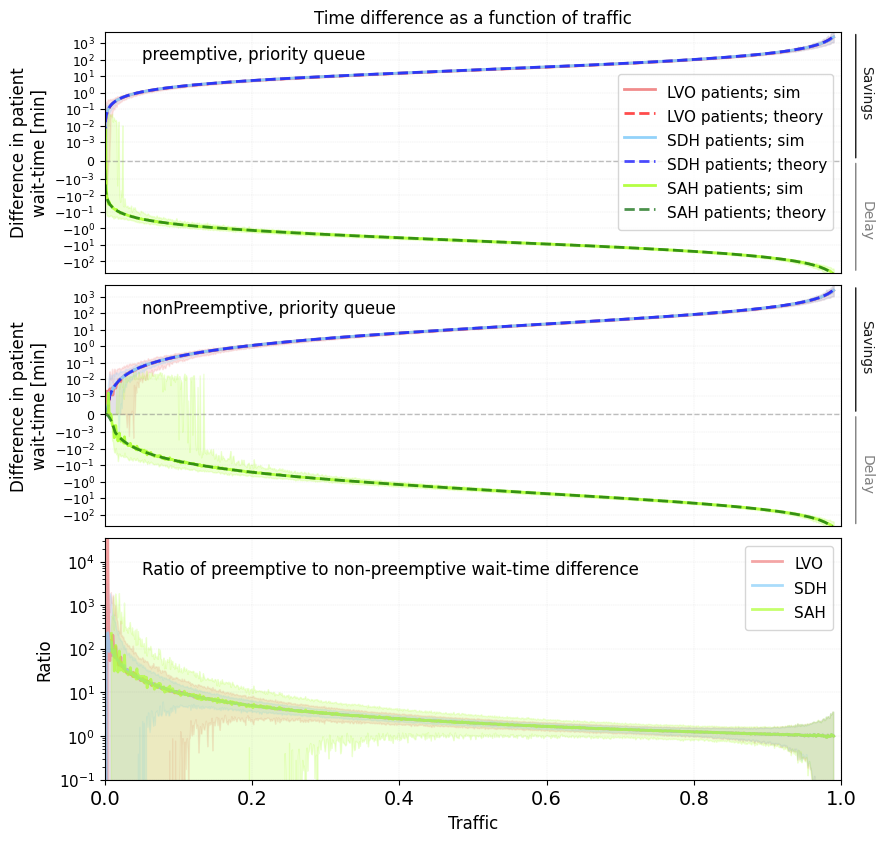

In [20]:
def plot_traffic (prioritytype='priority'):

    figsize=(9.5, 11)
    h  = plt.figure (figsize=figsize)
    gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
    gs.update (bottom=0.2)

    diseasenames = ['LVO', 'ICH', 'SAH']
    for gindex, queuetype in enumerate (queuetypes):

        data = results['traffics'][queuetype][prioritytype]
        xvalues = numpy.array (data['LVO']['timeSaved']['xvalue'])
        ylabel = 'Difference in patient\nwait-time [min]'

        axis = h.add_subplot (gs[gindex])

        for diseasename in diseasenames:
            yvalues = -1 *  (data[diseasename]['timeSaved']['sim']['mean'])
            lower95 = -1 *  (data[diseasename]['timeSaved']['sim']['upper95'])
            upper95 = -1 *  (data[diseasename]['timeSaved']['sim']['lower95'])
            label = 'SAH patients; sim'.format (diseasename)  if diseasename == 'SAH' else \
                    ('LVO patients; sim'.format (diseasename) if diseasename == 'LVO' else \
                    'SDH patients; sim'.format (diseasename))
            axis.plot (xvalues, yvalues, color=colors['sim_'+diseasename], linestyle='-',
                       alpha=0.9, linewidth=2, label=label)
            axis.fill_between (xvalues, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
            label = 'SAH patients; theory'.format (diseasename)  if diseasename == 'SAH' else \
                    ('LVO patients; theory'.format (diseasename) if diseasename == 'LVO' else \
                    'SDH patients; theory'.format (diseasename))
            axis.plot (xvalues, -1 *  (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
                       alpha=0.7, linewidth=2, label=label)

        # Format others
        axis.tick_params(axis='both', which='major', labelsize=9)
        if gindex==0:
            axis.set_title ('Time difference as a function of traffic', fontsize=12)
            axis.legend(loc='best', ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
        axis.text(0.05, 100, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)

        # Format x-axis
        axis.set_xlim (0, 1)
        xticks = numpy.linspace (0, 1, 6)
        axis.set_xticks (xticks)
        for xtick in axis.get_xticks():
            axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        if gindex == 2:
            axis.set_xlabel ('Traffic', fontsize=12)
            for tick in axis.xaxis.get_major_ticks(): tick.label.set_fontsize(12) 
        else:
            axis.get_xaxis().set_visible(False)
            
        # Format y-axis        
        axis.set_ylim (-500, 5000)
        axis.set_yscale('symlog', linthresh=1e-3)
        axis.set_ylabel (ylabel, fontsize=12)
        axis_yticks =[-1.e+02, -1.e+01, -1.e+00, -1.e-01, -1.e-02, -1.e-03, 0, 1.e-03,  1.e-02,  1.e-01,  1.e+00, 1.e+01,  1.e+02,  1.e+03]    
        for ytick in axis_yticks:
            axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        axis.axhline (y=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)

        y_min = -500
        y_max = 5000
        
        # Bracket from 0 up to the top (Savings)
        axis.annotate(
            '', 
            xy=(1.02, y_max),           # top in data coords
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, 0),          # zero
            textcoords=('axes fraction', 'data'),
            arrowprops=dict(
                arrowstyle='-', 
                fc='black', 
                ec='black', 
                lw=1,
                alpha=0.9
            ),
            clip_on=False
        )
        axis.text(
            1.025,                       # a bit to the right
            1,                    # halfway between top and 0
            "Savings", 
            rotation=-90,
            va='center', 
            ha='left',
            color='black',
            alpha = 0.9,
            transform=axis.get_yaxis_transform()  # positions text in data coords
        )
        
        # Bracket from 0 down to the bottom (Delay)
        axis.annotate(
            '',
            xy=(1.02, 0),
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, y_min),
            textcoords=('axes fraction', 'data'),
            arrowprops=dict(
                arrowstyle='-', 
                fc='black', 
                ec='black', 
                lw=1, 
                alpha=0.5
            ),
            clip_on=False
        )
        axis.text(
            1.025,
            -1/3,  # or pick something representative
            "Delay",
            rotation=-90,
            va='center',
            ha='left',
            color='black',
            alpha=0.5,
            transform=axis.get_yaxis_transform()
        )
        
    ## Ratio between preemptive vs non-preemptive
    axis = h.add_subplot (gs[2])

    for diseasename in diseasenames:
        prem = -1 *  (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        nonprem = -1 *  (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        ratio = prem / nonprem

        premlower95 = -1 *  (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        premupper95 = -1 *  (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        premsd = (premlower95 - premupper95)/1.96
        nonpremlower95 = -1 *  (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        nonpremupper95 = -1 *  (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

        ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
        ratio95 = ratiosd * 1.96
        
        axis.plot (xvalues, ratio, color=colors['sim_'+diseasename], linestyle='-',
                   alpha=0.7, linewidth=2, label='LVO' if diseasename == 'LVO' else ('SDH' if diseasename == 'ICH' else 'SAH'))
        axis.fill_between (xvalues, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

    # Format others
    axis.tick_params(axis='both', which='major', labelsize=11)
    axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
    text = 'Ratio of preemptive to non-preemptive wait-time difference'
    axis.text(0.05, 5000, text, fontsize=12)

    # Format x-axis
    axis.set_xlim (0, 1)
    xticks = numpy.linspace (0, 1, 6)
    axis.set_xticks (xticks)
    for xtick in axis.get_xticks():
        axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
    axis.set_xlabel ('Traffic', fontsize=12)
    for tick in axis.xaxis.get_major_ticks(): tick.label1.set_fontsize(14) 

    # Format y-axis        
    axis.set_ylim (ymin=1e-1)
    axis.set_yscale('log', nonpositive='clip')
    axis.set_ylabel ('Ratio', fontsize=12)
    for ytick in axis.get_yticks():
        axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

    plt.show()
    h.savefig (plotPath + 'AILVOICHExp3_1D_traffic_{0}.png'.format (prioritytype), dpi=600)
    plt.close('all')    

plot_traffic (prioritytype='priority')
#plot_traffic (prioritytype='hierarchical')

Points:
1. mean values from theory matches that of simulation
2. Time-savings among LVO patients are above time delay experienced by ICH patients
3. non-preemptive assumptions matters more at lower traffic
4. With 2 diseases and 1 AI triaging LVO, priority and hierarchical queues return same outputs

## AILVOSes

diseaseProbICH = 0.211 from 10.2214/AJR.24.31639, Table 1

diseaseProbLVO = 0.125 from 10.3389/fneur.2023.1179250, p.3

sameReadTime = 30

groupProbNCCT = 0.7

groupProbCTA  = 0.3

traffic = 0.8

nRad = 1

In [21]:
with open ('results_AILVOICHExp3_1D_AIs.p', 'rb') as f:
    results = pickle.load (f)
f.close ()

0.45907564758917374
0.9960120240480962
0.45907564758917374
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


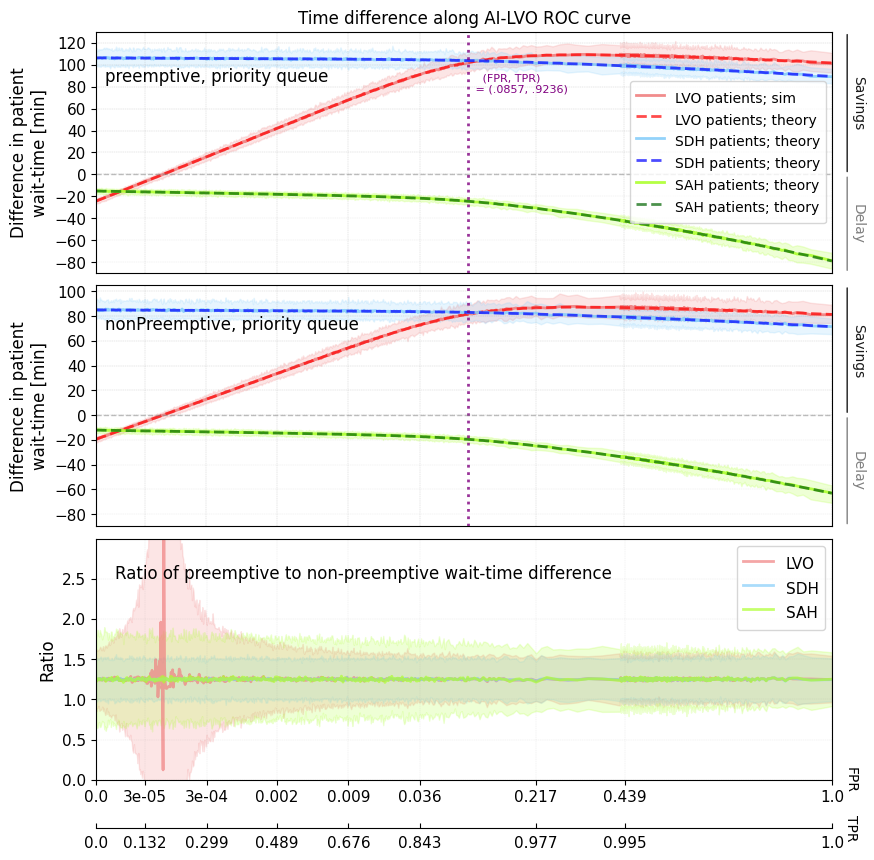

0.45907564758917374
0.9960120240480962
0.45907564758917374
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


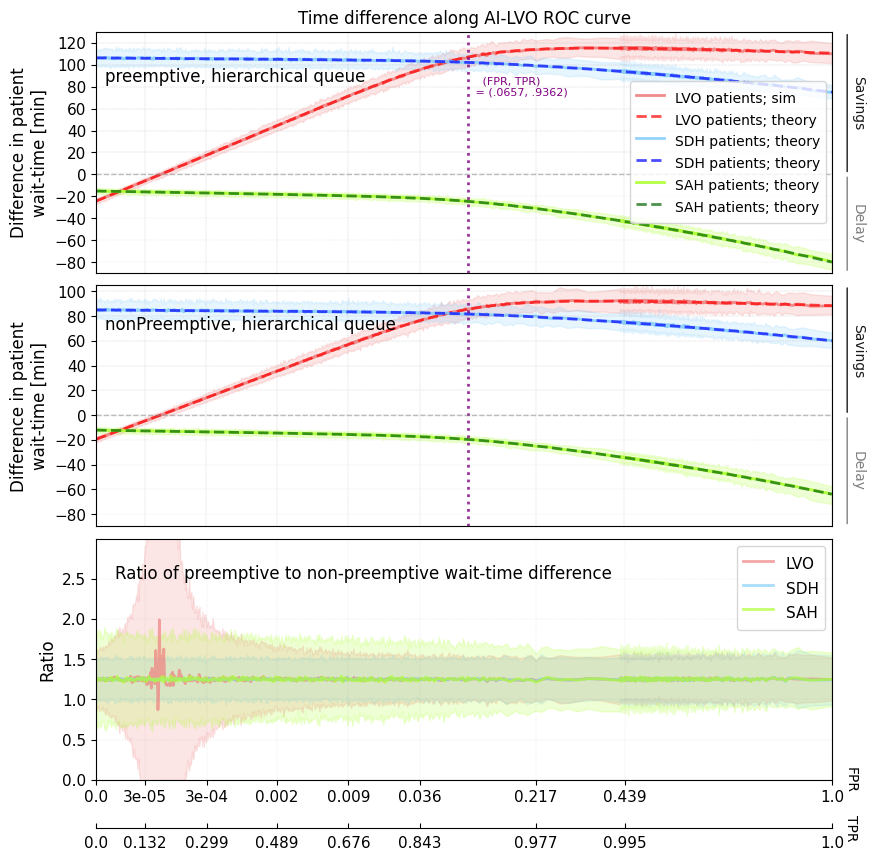

0.35169527948821233
0.9960120240480962
0.35169527948821233
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


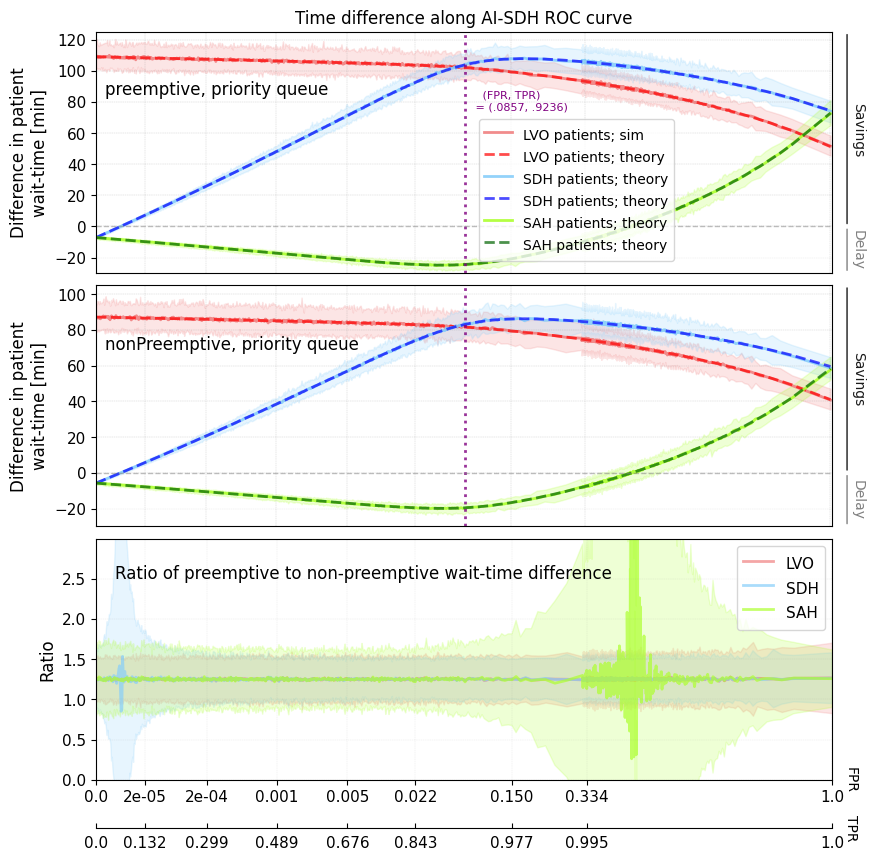

0.35169527948821233
0.9960120240480962
0.35169527948821233
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


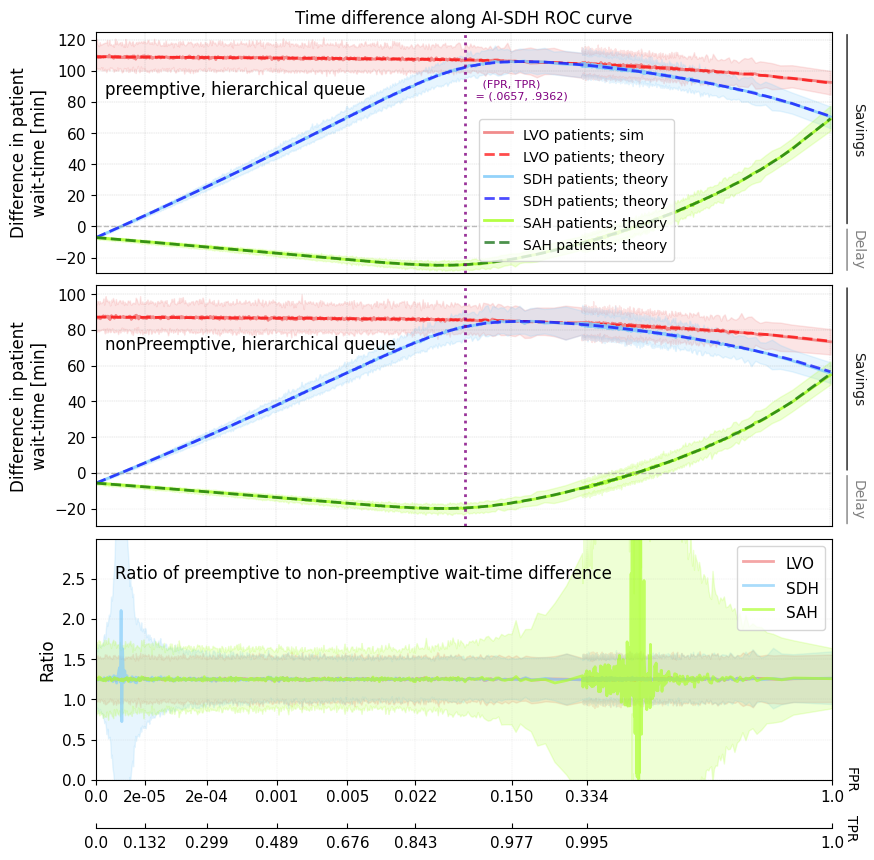

In [60]:
# def plot_AILVOSes (prioritytype='priority', avar='AILVOSes'):

#     figsize=(9.5, 11)
#     h  = plt.figure (figsize=figsize)
#     gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
#     gs.update (bottom=0.2)

#     for gindex, queuetype in enumerate (queuetypes):

#         data = results[avar][queuetype][prioritytype]
#         diseasename = 'ICH' if 'ICH' in avar else 'LVO'
#         xvalues = 1- numpy.array (data[diseasename]['timeSaved']['sp'])
#         ylabel = 'Difference in patient\nwait-time [min]'

#         axis = h.add_subplot (gs[gindex])

#         for diseasename in diseasenames:
#             yvalues = -1* (data[diseasename]['timeSaved']['sim']['mean'])
#             lower95 = -1* (data[diseasename]['timeSaved']['sim']['upper95'])
#             upper95 = -1* (data[diseasename]['timeSaved']['sim']['lower95'])
#             label = 'Time-delay for {0} patients; sim'.format (diseasename)  if diseasename == 'SAH' else \
#                     'Time-saved for {0} patients; sim'.format (diseasename)
#             axis.plot (xvalues, yvalues, color=colors['sim_'+diseasename], linestyle='-',
#                        alpha=0.9, linewidth=2, label=label)
#             axis.fill_between (xvalues, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
#             label = 'Time-delay for {0} patients; theory'.format (diseasename)  if diseasename == 'SAH' else \
#                     'Time-saved for {0} patients; theory'.format (diseasename)
#             axis.plot (xvalues, -1* (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
#                        alpha=0.7, linewidth=2, label=label)

#         # Format others
#         axis.tick_params(axis='both', which='major', labelsize=11)
#         if gindex==0:
#             name = 'AI-LVO' if avar=='AILVOSes' else 'AI-ICH'
#             axis.set_title ('Time difference along {0} ROC curve'.format (name), fontsize=12)
#             axis.legend(loc='best', ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
#         axis.text(0.58, 8, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)

#         # Format x-axis
#         axis.set_xlim (0, 1)
#         xticks = numpy.linspace (0, 1, 6)
#         axis.set_xticks (xticks)
#         for xtick in axis.get_xticks():
#             axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
#         axis.get_xaxis().set_visible(False)

#         # Format y-axis        
#         #axis.set_ylim (ymin=0)
#         axis.set_ylabel (ylabel, fontsize=12)
#         for ytick in axis.get_yticks():
#             axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

#     ## Ratio between preemptive vs non-preemptive
#     axis = h.add_subplot (gs[2])

#     for diseasename in diseasenames:
#         prem = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
#         nonprem = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
#         ratio = prem / nonprem

#         premlower95 = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
#         premupper95 = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
#         premsd = (premlower95 - premupper95)/1.96
#         nonpremlower95 = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
#         nonpremupper95 = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
#         nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

#         ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
#         ratio95 = ratiosd * 1.96

#         axis.plot (xvalues, ratio, color=colors['sim_'+diseasename], linestyle='-',
#                    alpha=0.7, linewidth=2, label=diseasename)
#         axis.fill_between (xvalues, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

#     # Format others
#     axis.tick_params(axis='both', which='major', labelsize=11)
#     axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
#     text = 'Ratio of preemptive to non-preemptive wait-time difference'
#     axis.text(0.05, 2.5, text, fontsize=12)

#     # Format x-axis
#     axis.set_xlim (0, 1)
#     xticks = numpy.linspace (0, 1, 6)
#     axis.set_xticks (xticks)
#     for xtick in axis.get_xticks():
#         axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
#     axis.set_xlabel ('False-Positive Rate along ROC curve', fontsize=12)
#     for tick in axis.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 

#     # Format y-axis        
#     axis.set_ylim (0, 3)
#     yticks = numpy.linspace (0, 3, 7)[:-1]
#     axis.set_yticks (yticks)
#     axis.set_ylabel ('Ratio', fontsize=12)
#     for ytick in axis.get_yticks():
#         axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

#     plt.show()
#     h.savefig (plotPath + 'AILVOICHExp3_1D_{0}_{1}.png'.format (avar, prioritytype), dpi=600)
#     plt.close('all')  


import matplotlib.ticker as ticker

def plot_AILVOSes (prioritytype='priority',  avar='AILVOSes'):

    diseasenames = ['LVO', 'ICH', 'SAH']

    figsize=(9.5, 11)
    h  = plt.figure (figsize=figsize)
    gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
    gs.update (bottom=0.2)

    for gindex, queuetype in enumerate (queuetypes):

        data = results[avar][queuetype][prioritytype]

        print(1-data['LVO']['timeSaved']['sp'][600])
        print(data['LVO']['timeSaved']['se'][600])
    
        xvalues = 1- numpy.array (data['LVO']['timeSaved']['sp'])
        zvalues = numpy.array (data['LVO']['timeSaved']['se'])
        xvalues_sqrt = 1- numpy.array (data['LVO']['timeSaved']['sp']) + numpy.array (data['LVO']['timeSaved']['se'])
        
        ylabel = 'Difference in patient\nwait-time [min]'

        axis = h.add_subplot (gs[gindex])

        for diseasename in diseasenames:
            yvalues = -1 *  (data[diseasename]['timeSaved']['sim']['mean'])
            lower95 = -1 *  (data[diseasename]['timeSaved']['sim']['upper95'])
            upper95 = -1 *  (data[diseasename]['timeSaved']['sim']['lower95'])
            label = 'LVO patients; sim'.format (diseasename) if diseasename == 'LVO' else ('SDH patients; theory'.format (diseasename) if diseasename == 'ICH' else 'SAH patients; theory'.format(diseasename))
            axis.plot (xvalues_sqrt, yvalues, color=colors['sim_'+diseasename], linestyle='-',
                       alpha=0.9, linewidth=2, label=label)
            axis.fill_between (xvalues_sqrt, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
            label = 'LVO patients; theory'.format (diseasename) if diseasename == 'LVO' else ('SDH patients; theory'.format (diseasename) if diseasename == 'ICH' else 'SAH patients; theory'.format(diseasename))
            axis.plot (xvalues_sqrt, -1 *  (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
                       alpha=0.7, linewidth=2, label=label)

        # Format others
        axis.tick_params(axis='both', which='major', labelsize=11)
        if gindex==0:
            if avar == 'AILVOSes':
                axis.set_title ('Time difference along AI-LVO ROC curve', fontsize=12)
                axis.legend(loc='center right', ncol=1, fontsize=10, handleheight=2, labelspacing=0.03)
            else:
                axis.set_title ('Time difference along AI-SDH ROC curve', fontsize=12)
                axis.legend(loc=(.52,.05), ncol=1, fontsize=10, handleheight=2, labelspacing=0.03)
        if queuetype == 'preemptive':
            axis.text(0.025, 85, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)
        if queuetype == 'nonPreemptive' and prioritytype == 'priority':
            axis.text(0.025, 69, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)
        if queuetype == 'nonPreemptive' and prioritytype == 'hierarchical':
            axis.text(0.025, 69, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)
        if queuetype == 'preemptive' and prioritytype == 'priority' and avar == 'AIICHSes':
            axis.text(1.02, 75, '   (FPR, TPR) \n = (.0857, .9236)', color = 'purple', fontsize=8)
        if queuetype == 'preemptive' and prioritytype == 'priority' and avar == 'AILVOSes':
            axis.text(1.02, 75, '   (FPR, TPR) \n = (.0857, .9236)', color = 'purple', fontsize=8)
        if queuetype == 'preemptive' and prioritytype == 'hierarchical' and avar == 'AIICHSes':
            axis.text(1.02, 82, '   (FPR, TPR) \n = (.0657, .9362)', color = 'purple', fontsize=8)
        if queuetype == 'preemptive' and prioritytype == 'hierarchical' and avar == 'AILVOSes':
            axis.text(1.02, 72, '   (FPR, TPR) \n = (.0657, .9362)', color = 'purple', fontsize=8)
                      
            
        # Format x-axis

        axis.set_xlim(0, 0.1)
        n_points = 8
        tanh_space = numpy.linspace(-7.5, 10, n_points)  # Wider range creates more clustering at ends
        tanh_values = numpy.tanh(0.1*tanh_space)
        tanh_normalized = 0.54 * ((tanh_values - tanh_values.min()) / (tanh_values.max() - tanh_values.min()) )
        nonlinear_indices = (tanh_normalized * (len(xvalues) - 1)).astype(int)
        if nonlinear_indices[-1] != len(xvalues) - 1:  # Check if last index is missing
            nonlinear_indices = numpy.append(nonlinear_indices, len(xvalues) - 1)

        xticks = numpy.linspace (0, 2, 5)
        selected_indices = numpy.round(nonlinear_indices).astype(int)
        selected_xvalues_transformed = xvalues_sqrt[selected_indices]     # Original x-values corresponding to sqrt(xvalues)
        axis.set_xticks (xticks)
        for xtick in selected_xvalues_transformed:
            axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        axis.get_xaxis().set_visible(False)

        # Format y-axis        
        axis.set_ylim (ymin=0)
        axis.set_ylabel (ylabel, fontsize=12)
        for ytick in axis.get_yticks():
            axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
    
        # for xval, zval in zip(xvalues, zvalues):
        #     plt.axvline(x=xval, color='gray', linestyle='--', alpha=0.5)
        for xtick in selected_xvalues_transformed:
            axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        if avar == 'AILVOSes':
            axis.axvline(x=1-0.9143+0.9236, color='purple', alpha = 0.8, linestyle=':', linewidth=2, label='Typical LVO AI threshold')
        else:
            axis.axvline(x=1-0.9343+0.9362, color='purple', alpha = 0.8, linestyle=':', linewidth=2, label='Typical SDH AI threshold')
        axis.get_xaxis().set_visible(False)

        # Format y-axis 
        if queuetype == 'preemptive' and avar == 'AILVOSes':
            axis.set_ylim (ymin=-90, ymax = 130)
            axis.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120])
        elif queuetype == 'preemptive' and avar == 'AIICHSes':
            axis.set_ylim (ymin=-30, ymax = 125)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100, 120])
        elif queuetype == 'nonPreemptive' and avar == 'AILVOSes':
            axis.set_ylim (ymin=-90, ymax = 105)
            axis.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80, 100])
        elif queuetype == 'nonPreemptive' and avar == 'AIICHSes':
            axis.set_ylim (ymin=-30, ymax = 105)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100])
        axis.set_ylabel (ylabel, fontsize=12)
        for ytick in axis.get_yticks():
            axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        axis.axhline(y=0, color='gray', alpha=0.5, linestyle='--', linewidth=1)


        if queuetype == 'preemptive' and avar == 'AILVOSes':
            ymax = 130
            ymin = -90
        elif queuetype == 'preemptive' and avar == 'AIICHSes':
            ymax = 125
            ymin = -30
        elif queuetype == 'nonPreemptive' and avar == 'AILVOSes':
            ymax = 105
            ymin = -90
        else:
            ymax = 105
            ymin = -30

        savingscoord = ymax/2
        delaycoord = ymin/2

        axis.annotate(
            '', 
            xy=(1.02, 0),           # top in data coords
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, ymax),          # zero
            textcoords=('axes fraction', 'data'),
            arrowprops=dict( 
                arrowstyle = '-',
                fc='black', 
                ec='black', 
                lw=1,
                alpha=0.9
            ),
            clip_on=False
        )
        axis.text(
            1.025,                       # a bit to the right
            savingscoord,                    # halfway between top and 0
            "Savings", 
            rotation=-90,
            va='center', 
            ha='left',
            color='black',
            alpha=0.9,
            transform=axis.get_yaxis_transform()  # positions text in data coords
        )
        
        # Bracket from 0 down to the bottom (Delay)
        axis.annotate(
            '',
            xy=(1.02, 0),
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, ymin),
            textcoords=('axes fraction', 'data'),
            arrowprops=dict(
                arrowstyle='-', 
                fc='black', 
                ec='black', 
                lw=1, 
                alpha=0.5
            ),
            clip_on=False
        )
        axis.text(
            1.025,
            delaycoord,  # or pick something representative
            "Delay",
            rotation=-90,
            va='center',
            ha='left',
            color='black',
            alpha=0.5,
            transform=axis.get_yaxis_transform()
        )
        # -------------------------------------

    ## Ratio between preemptive vs non-preemptive
    axis = h.add_subplot (gs[2])

    for diseasename in diseasenames:
        prem = numpy.abs (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        nonprem = numpy.abs (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        ratio = prem / nonprem

        premlower95 = numpy.abs (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        premupper95 = numpy.abs (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        premsd = (premlower95 - premupper95)/1.96
        nonpremlower95 = numpy.abs (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        nonpremupper95 = numpy.abs (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

        ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
        ratio95 = ratiosd * 1.96

        axis.plot (xvalues_sqrt, ratio, color=colors['sim_'+diseasename], linestyle='-',
                   alpha=0.7, linewidth=2, label='LVO' if diseasename == 'LVO' else ('SDH' if diseasename == 'ICH' else 'SAH'))
        axis.fill_between (xvalues_sqrt, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

    # Format others
    axis.tick_params(axis='both', which='major', labelsize=11)
    axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
    text = 'Ratio of preemptive to non-preemptive wait-time difference'
    axis.text(0.05, 2.5, text, fontsize=12)

    # Format x-axis
    axis.set_xlim(0, 0.1)
    n_points = 8
    tanh_space = numpy.linspace(-7.5, 10, n_points)  # Wider range creates more clustering at ends
    tanh_values = numpy.tanh(0.1*tanh_space)
    tanh_normalized = 0.54 * ((tanh_values - tanh_values.min()) / (tanh_values.max() - tanh_values.min()) )
    nonlinear_indices = (tanh_normalized * (len(xvalues) - 1)).astype(int)
    if nonlinear_indices[-1] != len(xvalues) - 1:  # Check if last index is missing
        nonlinear_indices = numpy.append(nonlinear_indices, len(xvalues) - 1)

    # Convert to integers for array indexing
    selected_indices = numpy.round(nonlinear_indices).astype(int)
    print('linear indices', numpy.linspace(0, len(xvalues) - 1, 5, dtype=int))
    print('selected indices', selected_indices)

    #selected_indices = numpy.linspace(0, len(xvalues) - 1, 5, dtype=int)
    # xvalues_log = numpy.log(xvalues_sqrt)
    # selected_xvalues_log = xvalues_log[selected_indices]
    # selected_xvalues_transformed = numpy.exp(selected_xvalues_log)
    selected_xvalues_transformed = xvalues_sqrt[selected_indices]     # Original x-values corresponding to sqrt(xvalues)
    selected_xvalues_original = xvalues[selected_indices] 
    selected_zvalues_original = zvalues[selected_indices]
    axis.set_xticks(selected_xvalues_transformed)
    #axis.set_xticklabels([f'{xtick:.0e}' for xtick in selected_xvalues_original])  # Display original values
    axis.set_xticklabels([
        0.0 if i == 0 else (1.0 if i==8 else (f"{xtick:.0e}" if i < 3 else f"{xtick:.3f}"))
        for i, xtick in enumerate(selected_xvalues_original)
    ])
    

    axis.annotate(
    'FPR', 
    xy=(1.025, 0),  # Adjust the position: (x, y) relative to the axis
    xycoords='axes fraction',  # Use fraction of the axis dimensions
    fontsize=10, 
    rotation=270,  # Rotate the label vertically
    ha='center',  # Horizontal alignment
    va='center'   # Vertical alignment
    )   
    
    # Add vertical lines for each tick
    for xtick in selected_xvalues_transformed:
        axis.axvline(x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
    
    # Add the secondary x-axis for z-values
    secondary_axis = axis.secondary_xaxis(-0.2)  # Position below the primary axis
    secondary_axis.set_ticks(selected_xvalues_transformed)
    secondary_axis.set_xticklabels([
        0.0 if i == 0 else (1.0 if i==8 else (f'{zval:.3f}')) for i, zval in enumerate(selected_zvalues_original)
    ])
    # secondary_axis.xaxis.set_major_formatter(ticker.ScalarFormatter())
    # secondary_axis.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    
    # Optionally style ticks for better visibility
    secondary_axis.tick_params(axis='x', labelsize=11, which='both', direction = 'in', pad=5)
    axis.annotate(
    'TPR', 
    xy=(1.025, -0.2),  # Adjust the position: (x, y) relative to the axis
    xycoords='axes fraction',  # Use fraction of the axis dimensions
    fontsize=10, 
    rotation=270,  # Rotate the label vertically
    ha='center',  # Horizontal alignment
    va='center'   # Vertical alignment
    )   
    
    # Format y-axis        
    axis.set_ylim (0, 3)
    yticks = numpy.linspace (0, 3, 7)[:-1]
    axis.set_yticks (yticks)
    axis.set_ylabel ('Ratio', fontsize=12)
    for ytick in axis.get_yticks():
        axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

    plt.show()
    h.savefig (plotPath + f'AILVO_1D_{avar}_{0}.png'.format (prioritytype), dpi=600)
    plt.close('all')    

plot_AILVOSes (prioritytype='priority', avar='AILVOSes')
plot_AILVOSes (prioritytype='hierarchical', avar='AILVOSes')

plot_AILVOSes (prioritytype='priority', avar='AIICHSes')
plot_AILVOSes (prioritytype='hierarchical', avar='AIICHSes')